In [1]:
# Step 1: import pandas for data handling
import pandas as pd

In [5]:
# Step 2: read the Superstore data from the data folder
file_path = "C:/Users/angad/Desktop/global_superstore_dashboard/data/superstore.csv"   # change the name if your file is different
df = pd.read_csv(file_path)

# Step 3: look at the first few rows
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [6]:
# Step 4: check shape (rows, columns)
df.shape

(51290, 27)

In [7]:
# Step 5: see full column list and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [9]:
# Step 6: create a working copy so we don't touch the original df
data = df.copy()

# Step 7: rename some columns to easier Python-style names
data = data.rename(columns={
    "Order.Date": "OrderDate",
    "Ship.Date": "ShipDate",
    "Ship.Mode": "ShipMode",
    "Customer.ID": "CustomerID",
    "Customer.Name": "CustomerName",
    "Product.ID": "ProductID",
    "Product.Name": "ProductName",
    "Sub.Category": "SubCategory",
    "Shipping.Cost": "ShippingCost"
})

# Quick check
data.head(3)

,Category,City,Country,CustomerID,CustomerName,Discount,Market,记录数,OrderDate,Order.ID,...,Sales,Segment,ShipDate,ShipMode,ShippingCost,State,SubCategory,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32


In [10]:
# Extra: rename the Chinese '记录数' column to an English name
data = data.rename(columns={"记录数": "RecordCount"})

# quick check that it worked
[data_col for data_col in data.columns if "Record" in data_col]

['RecordCount']

In [11]:
# Step 8: convert OrderDate and ShipDate to datetime
data["OrderDate"] = pd.to_datetime(data["OrderDate"])
data["ShipDate"] = pd.to_datetime(data["ShipDate"])

# Step 9: confirm types changed
data[["OrderDate", "ShipDate"]].dtypes

OrderDate    datetime64[ns]
ShipDate     datetime64[ns]
dtype: object

In [12]:
# Step 10: create extra time columns based on OrderDate
data["OrderYear"] = data["OrderDate"].dt.year
data["OrderMonth"] = data["OrderDate"].dt.month
data["OrderMonthName"] = data["OrderDate"].dt.strftime("%b")   # Jan, Feb, ...
data["OrderYearMonth"] = data["OrderDate"].dt.to_period("M").astype(str)

# Quick look at the new columns
data[["OrderDate", "OrderYear", "OrderMonth", "OrderMonthName", "OrderYearMonth"]].head()

,OrderDate,OrderYear,OrderMonth,OrderMonthName,OrderYearMonth
0,2011-01-07,2011,1,Jan,2011-01
1,2011-01-21,2011,1,Jan,2011-01
2,2011-08-05,2011,8,Aug,2011-08
3,2011-08-05,2011,8,Aug,2011-08
4,2011-09-29,2011,9,Sep,2011-09


In [13]:
# Step 11: profit margin per order line
data["ProfitMargin"] = data["Profit"] / data["Sales"]

# Optional: check a few values
data[["Sales", "Profit", "ProfitMargin"]].head()

,Sales,Profit,ProfitMargin
0,19,9.3312,0.491116
1,19,9.2928,0.489095
2,21,9.8418,0.468657
3,111,53.2608,0.479827
4,6,3.1104,0.518400


In [14]:
# Step 12: shipping time in days
data["ShippingDays"] = (data["ShipDate"] - data["OrderDate"]).dt.days

data[["OrderDate", "ShipDate", "ShippingDays"]].head()

,OrderDate,ShipDate,ShippingDays
0,2011-01-07,2011-01-09,2
1,2011-01-21,2011-01-26,5
2,2011-08-05,2011-08-09,4
3,2011-08-05,2011-08-09,4
4,2011-09-29,2011-10-03,4


In [15]:
# Step 13: function to decide if an order is late
def is_late_delivery(row):
    days = row["ShippingDays"]
    mode = row["ShipMode"]

    # if days is missing for some reason
    if pd.isna(days):
        return pd.NA

    if mode == "First Class":
        return days > 2
    elif mode == "Second Class":
        return days > 4
    elif mode == "Standard Class":
        return days > 7
    else:
        # fallback for any other shipping type
        return days > 5

# Step 14: apply the function row by row
data["IsLate"] = data.apply(is_late_delivery, axis=1)

# Quick check
data[["ShipMode", "ShippingDays", "IsLate"]].head()

,ShipMode,ShippingDays,IsLate
0,Second Class,2,False
1,Standard Class,5,False
2,Standard Class,4,False
3,Standard Class,4,False
4,Standard Class,4,False


In [16]:
# Step 15: clean up a couple more column names
data = data.rename(columns={
    "Order.ID": "OrderID",
    "Row.ID": "RowID"
})

# Check a few columns to be sure
[data_col for data_col in data.columns if "ID" in data_col]

['CustomerID', 'OrderID', 'ProductID', 'RowID']

In [17]:
# Step 16: save cleaned data for later use (and for dashboards)
output_path = "../output/superstore_clean.csv"
data.to_csv(output_path, index=False)

output_path

'../output/superstore_clean.csv'

In [18]:
# Step 17: calculate main KPIs for the executive overview

total_sales = data["Sales"].sum()
total_profit = data["Profit"].sum()
overall_margin = total_profit / total_sales

total_orders = data["OrderID"].nunique()

total_sales, total_profit, overall_margin, total_orders

(np.int64(12642905),
 np.float64(1467457.2912800002),
 np.float64(0.11606962887722404),
 25035)

In [19]:
# Step 18: print KPIs in a readable way
print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Overall Profit Margin: {overall_margin:.2%}")
print(f"Number of Orders: {total_orders:,}")

Total Sales: 12,642,905.00
Total Profit: 1,467,457.29
Overall Profit Margin: 11.61%
Number of Orders: 25,035


In [20]:
# Step 19: monthly summary for Sales and Profit
monthly = (
    data
    .groupby("OrderYearMonth")
    .agg(
        MonthlySales=("Sales", "sum"),
        MonthlyProfit=("Profit", "sum"),
        MonthlyOrders=("OrderID", "nunique")
    )
    .reset_index()
    .sort_values("OrderYearMonth")
)

monthly.head()

,OrderYearMonth,MonthlySales,MonthlyProfit,MonthlyOrders
0,2011-01,98902,8321.80096,216
1,2011-02,91152,12417.90698,183
2,2011-03,145726,15303.56826,277
3,2011-04,116927,12902.32438,267
4,2011-05,146762,12183.82870,295


In [21]:
# Step 20: import matplotlib for plotting
import matplotlib.pyplot as plt

# This line helps Jupyter show plots inside the notebook
%matplotlib inline

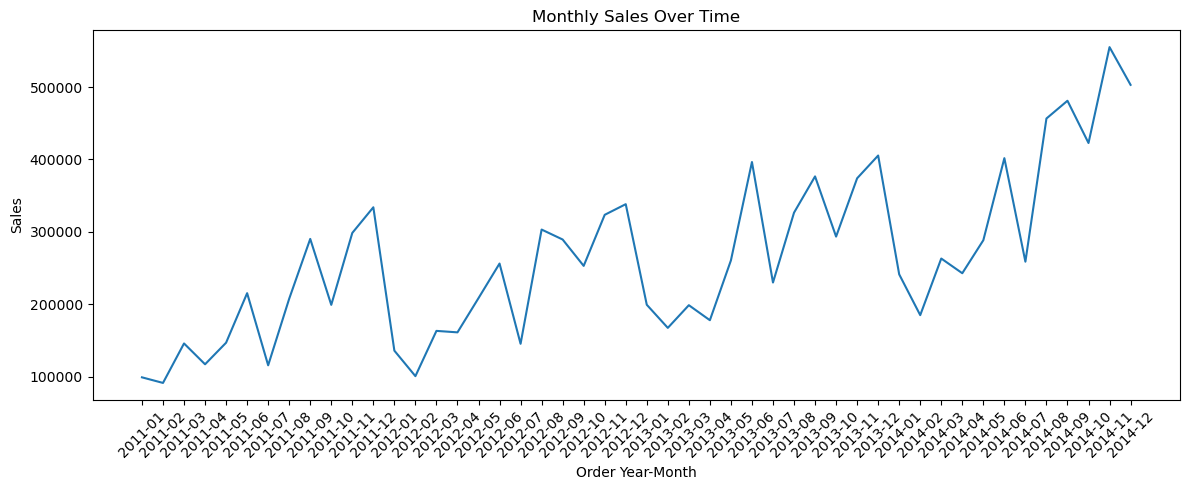

In [22]:
# Step 21: line chart of Monthly Sales over time
plt.figure(figsize=(12, 5))
plt.plot(monthly["OrderYearMonth"], monthly["MonthlySales"])

plt.title("Monthly Sales Over Time")
plt.xlabel("Order Year-Month")
plt.ylabel("Sales")

plt.xticks(rotation=45)  # rotate labels so they don't overlap
plt.tight_layout()
plt.show()

In [23]:
# Step 22: summary by Region and Country
region_country = (
    data
    .groupby(["Region", "Country"])
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("OrderID", "nunique")
    )
    .reset_index()
)

region_country["ProfitMargin"] = region_country["Profit"] / region_country["Sales"]

# Take a quick look at the top rows sorted by Sales
region_country.sort_values("Sales", ascending=False).head(10)

,Region,Country,Sales,Profit,Orders,ProfitMargin
126,Oceania,Australia,925257,103907.43300,1420,0.112301
57,Central,France,858930,109029.00300,1222,0.126936
151,West,United States,725514,108418.44890,1611,0.149437
120,North Asia,China,700591,150683.08500,925,0.215080
112,East,United States,678834,91522.78000,1401,0.134824
58,Central,Germany,628857,107322.82050,907,0.170663
116,North,Mexico,622620,102818.09752,1329,0.165138
68,Central Asia,India,589664,129071.83500,785,0.218890
119,North,United Kingdom,528570,111900.15000,775,0.211704
65,Central,United States,501256,39706.36250,1175,0.079214


In [24]:
# Step 23: check for missing values in each column
data.isna().sum()

Category          0
City              0
Country           0
CustomerID        0
CustomerName      0
Discount          0
Market            0
RecordCount       0
OrderDate         0
OrderID           0
Order.Priority    0
ProductID         0
ProductName       0
Profit            0
Quantity          0
Region            0
RowID             0
Sales             0
Segment           0
ShipDate          0
ShipMode          0
ShippingCost      0
State             0
SubCategory       0
Year              0
Market2           0
weeknum           0
OrderYear         0
OrderMonth        0
OrderMonthName    0
OrderYearMonth    0
ProfitMargin      0
ShippingDays      0
IsLate            0
dtype: int64

In [25]:
# Step 24: check for fully duplicated rows
num_dupes = data.duplicated().sum()
print(f"Number of fully duplicated rows: {num_dupes}")

Number of fully duplicated rows: 0


In [26]:
# Step 25: summary by Category and SubCategory
cat_sub = (
    data
    .groupby(["Category", "SubCategory"])
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("OrderID", "nunique")
    )
    .reset_index()
)

cat_sub["ProfitMargin"] = cat_sub["Profit"] / cat_sub["Sales"]

# Look at the top 10 by Sales
cat_sub.sort_values("Sales", ascending=False).head(10)

,Category,SubCategory,Sales,Profit,Orders,ProfitMargin
16,Technology,Phones,1706874,216717.00580,3133,0.126967
14,Technology,Copiers,1509439,258567.54818,2120,0.171300
1,Furniture,Chairs,1501682,140396.26750,3187,0.093493
0,Furniture,Bookcases,1466559,161924.41950,2284,0.110411
11,Office Supplies,Storage,1127124,108461.48980,4534,0.096229
4,Office Supplies,Appliances,1011081,141680.58940,1686,0.140128
15,Technology,Machines,779071,58867.87300,1422,0.075562
3,Furniture,Tables,757034,-64083.38870,836,-0.084651
13,Technology,Accessories,749307,129626.30620,2889,0.172995
6,Office Supplies,Binders,461952,72449.84600,5392,0.156834


In [27]:
# Step 26: import seaborn for prettier plots
import seaborn as sns

sns.set(style="whitegrid")

In [28]:
# Step 27: bar chart - total Profit by Category
cat_profit = (
    data
    .groupby("Category")
    .agg(TotalProfit=("Profit", "sum"))
    .reset_index()
    .sort_values("TotalProfit", ascending=False)
)

cat_profit

,Category,TotalProfit
2,Technology,663778.73318
1,Office Supplies,518473.83430
0,Furniture,285204.72380


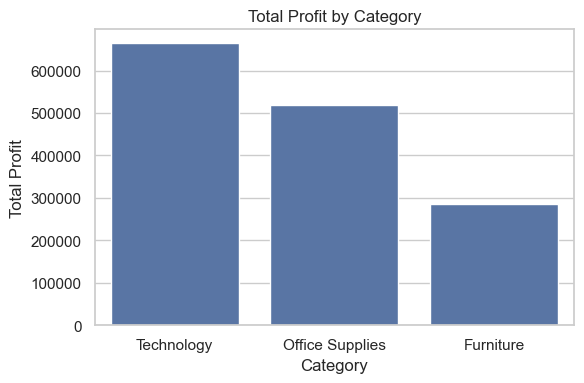

In [29]:
# Step 28: plot Profit by Category
plt.figure(figsize=(6, 4))
sns.barplot(data=cat_profit, x="Category", y="TotalProfit")

plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

In [30]:
# Step 29: compute total Profit by SubCategory
sub_profit = (
    data
    .groupby("SubCategory")
    .agg(TotalProfit=("Profit", "sum"))
    .reset_index()
    .sort_values("TotalProfit", ascending=False)
)

sub_profit.head(10)

,SubCategory,TotalProfit
6,Copiers,258567.54818
13,Phones,216717.00580
4,Bookcases,161924.41950
1,Appliances,141680.58940
5,Chairs,140396.26750
0,Accessories,129626.30620
14,Storage,108461.48980
3,Binders,72449.84600
12,Paper,59207.68270
11,Machines,58867.87300


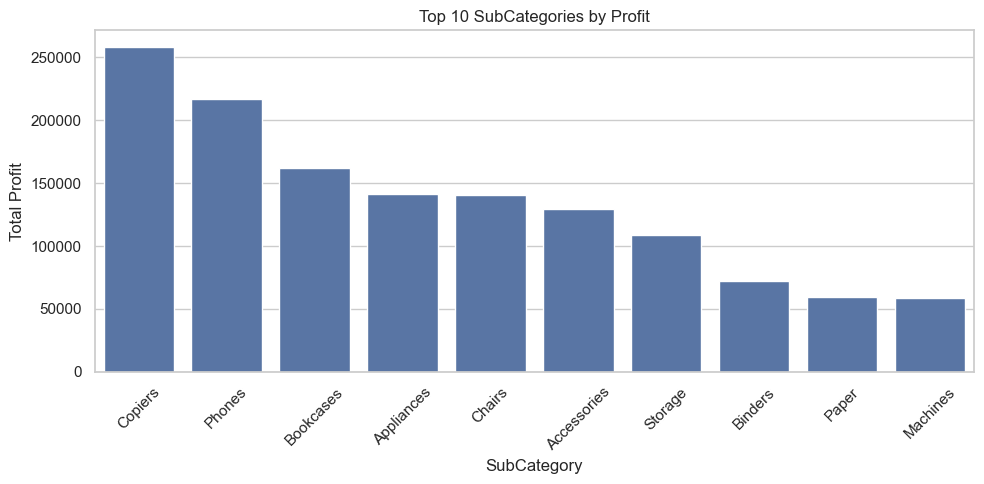

In [31]:
# Step 30: plot Top 10 SubCategories by Profit
top_sub = sub_profit.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_sub, x="SubCategory", y="TotalProfit")

plt.title("Top 10 SubCategories by Profit")
plt.xlabel("SubCategory")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Step 31: pivot table - Profit by Category and Region
cat_region_pivot = pd.pivot_table(
    data,
    index="Category",
    columns="Region",
    values="Profit",
    aggfunc="sum"
)

cat_region_pivot

Region,Africa,Canada,Caribbean,Central,Central Asia,EMEA,East,North,North Asia,Oceania,South,Southeast Asia,West
Category,,,,,,,,,,,,,
Furniture,16262.085,2613.24,6223.46000,54550.84010,48935.712,11534.136,3046.1658,30922.06800,52181.301,32048.904,22651.62810,-7269.7665,11504.9503
Office Supplies,28480.053,7957.53,14818.27600,121314.72090,27104.500,14869.392,41014.5791,64403.39300,40926.105,33306.186,67495.99880,4173.2515,52609.8490
Technology,44129.493,7246.62,13529.58504,135538.42064,56439.975,17494.443,47462.0351,99272.49152,72471.015,54734.022,50208.13928,20948.8440,44303.6496


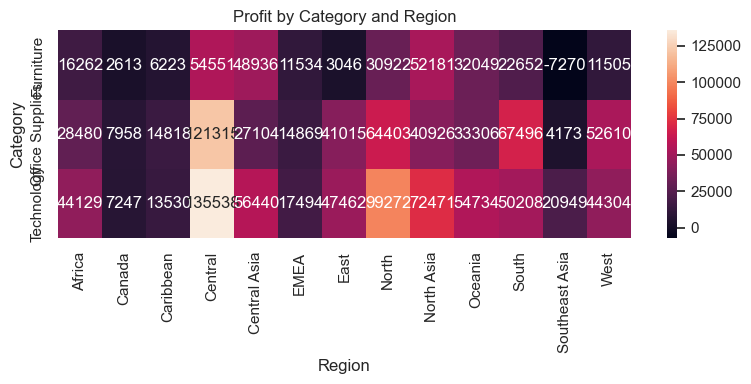

In [33]:
# Step 32: heatmap of Profit by Category and Region
plt.figure(figsize=(8, 4))
sns.heatmap(cat_region_pivot, annot=True, fmt=".0f")

plt.title("Profit by Category and Region")
plt.xlabel("Region")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [34]:
# Step 33: aggregate performance by Product
product_perf = (
    data
    .groupby(["ProductID", "ProductName", "Category", "SubCategory"])
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("OrderID", "nunique")
    )
    .reset_index()
)

product_perf["ProfitMargin"] = product_perf["Profit"] / product_perf["Sales"]

product_perf.head()

,ProductID,ProductName,Category,SubCategory,Sales,Profit,Orders,ProfitMargin
0,FUR-ADV-10000002,"Advantus Photo Frame, Duo Pack",Furniture,Furnishings,159,60.390,2,0.379811
1,FUR-ADV-10000108,"Advantus Clock, Erganomic",Furniture,Furnishings,350,3.360,3,0.009600
2,FUR-ADV-10000183,"Advantus Photo Frame, Black",Furniture,Furnishings,975,-651.738,8,-0.668449
3,FUR-ADV-10000188,"Advantus Stacking Tray, Erganomic",Furniture,Furnishings,125,4.200,5,0.033600
4,FUR-ADV-10000190,"Advantus Frame, Duo Pack",Furniture,Furnishings,222,104.460,1,0.470541


In [35]:
# Step 34: filter products with negative total profit
unprofitable_products = (
    product_perf
    .loc[product_perf["Profit"] < 0]
    .sort_values("Profit")
)

unprofitable_products.head(10)

,ProductID,ProductName,Category,SubCategory,Sales,Profit,Orders,ProfitMargin
9574,TEC-MA-10000418,Cubify CubeX 3D Printer Double Head Print,Technology,Machines,11100,-8879.9704,3,-0.799997
2614,OFF-AP-10001623,"Hoover Stove, White",Office Supplies,Appliances,11730,-4958.1630,6,-0.422691
9605,TEC-MA-10000822,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,16830,-4589.9730,4,-0.272726
10424,TEC-PH-10002991,"Apple Smart Phone, Full Size",Technology,Phones,7258,-4574.6439,4,-0.630290
9984,TEC-MOT-10003050,"Motorola Smart Phone, Cordless",Technology,Phones,10350,-3998.6820,7,-0.386346
9876,TEC-MA-10004125,Cubify CubeX 3D Printer Triple Head Print,Technology,Machines,8000,-3839.9904,1,-0.479999
699,FUR-CH-10001582,"Office Star Executive Leather Armchair, Black",Furniture,Chairs,6498,-3066.7830,5,-0.471958
1993,FUR-TA-10000198,Chromcraft Bull-Nose Wood Oval Conference Tabl...,Furniture,Tables,9918,-2876.1156,5,-0.289989
2157,FUR-TA-10002885,"Lesro Computer Table, Fully Assembled",Furniture,Tables,1200,-2798.4880,3,-2.332073
2118,FUR-TA-10002172,"Hon Conference Table, Rectangular",Furniture,Tables,3667,-2619.3105,3,-0.714292


In [36]:
# Step 35: save unprofitable products list
unprofitable_path = "../output/unprofitable_products.csv"
unprofitable_products.to_csv(unprofitable_path, index=False)

unprofitable_path

'../output/unprofitable_products.csv'

In [37]:
# Step 36: customer-level performance summary
customer_perf = (
    data
    .groupby(["CustomerID", "CustomerName", "Segment"])
    .agg(
        TotalSales=("Sales", "sum"),
        TotalProfit=("Profit", "sum"),
        NumOrders=("OrderID", "nunique"),
        LastOrderDate=("OrderDate", "max")
    )
    .reset_index()
)

customer_perf["ProfitMargin"] = customer_perf["TotalProfit"] / customer_perf["TotalSales"]

customer_perf.head()

,CustomerID,CustomerName,Segment,TotalSales,TotalProfit,NumOrders,LastOrderDate,ProfitMargin
0,AA-103151,Alex Avila,Consumer,1445,12.8760,5,2014-12-23,0.008911
1,AA-103152,Alex Avila,Consumer,6105,568.7370,7,2014-12-18,0.093159
2,AA-103153,Alex Avila,Consumer,633,228.9600,2,2013-02-05,0.361706
3,AA-103154,Alex Avila,Consumer,5565,-362.8825,5,2014-06-30,-0.065208
4,AA-103751,Allen Armold,Consumer,2407,577.9350,4,2014-12-25,0.240106


In [38]:
# Step 37: top 10 customers by total sales
top_customers = (
    customer_perf
    .sort_values("TotalSales", ascending=False)
    .head(10)
)

top_customers

,CustomerID,CustomerName,Segment,TotalSales,TotalProfit,NumOrders,LastOrderDate,ProfitMargin
4306,SM-203204,Sean Miller,Home Office,25042,-1980.7393,5,2014-10-13,-0.079097
4564,TC-209804,Tamara Chand,Corporate,19050,8981.3239,5,2013-11-27,0.471461
1042,CS-118451,Cari Sayre,Corporate,16655,2995.5816,11,2014-12-16,0.179861
4359,SP-209202,Susan Pistek,Consumer,16566,4974.5130,12,2014-02-28,0.300284
4792,VG-218051,Vivek Grady,Corporate,15654,2748.1878,7,2014-09-26,0.175558
3816,RB-193604,Raymond Buch,Consumer,15117,6976.0959,6,2014-09-26,0.461474
3611,PF-191201,Peter Fuller,Consumer,15063,968.2725,8,2014-09-29,0.064282
4487,TA-213854,Tom Ashbrook,Home Office,14596,4703.7883,4,2014-10-23,0.322266
490,BF-110051,Barry Franz,Home Office,14563,2272.4889,9,2014-12-23,0.156045
37,AB-101054,Adrian Barton,Consumer,14476,5444.8055,10,2014-11-20,0.376126


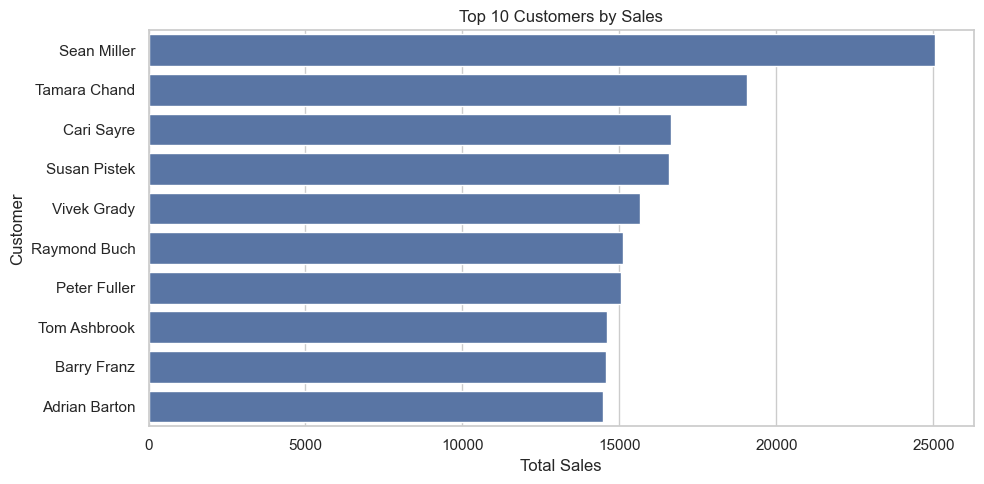

In [39]:
# Step 38: bar chart - Top 10 customers by Sales
plt.figure(figsize=(10, 5))

sns.barplot(
    data=top_customers,
    x="TotalSales",
    y="CustomerName"
)

plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()

In [40]:
# Step 39: summary by Segment
segment_summary = (
    data
    .groupby("Segment")
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("OrderID", "nunique"),
        Customers=("CustomerID", "nunique")
    )
    .reset_index()
)

segment_summary["ProfitMargin"] = segment_summary["Profit"] / segment_summary["Sales"]

segment_summary

,Segment,Sales,Profit,Orders,Customers,ProfitMargin
0,Consumer,6508141,749239.78206,13104,2509,0.115123
1,Corporate,3824808,441208.32866,7673,1457,0.115354
2,Home Office,2309956,277009.18056,4687,907,0.119920


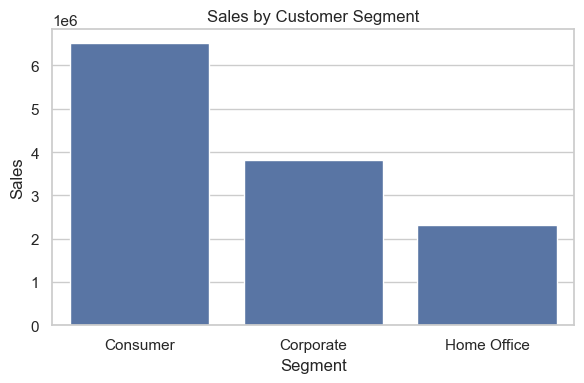

In [41]:
# Step 40: bar chart - Sales by Segment
plt.figure(figsize=(6, 4))
sns.barplot(data=segment_summary, x="Segment", y="Sales")

plt.title("Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

In [42]:
# Step 41: overall shipping KPIs
avg_shipping_days = data["ShippingDays"].mean()

# Some rows might be NA, so drop NAs when calculating late rate
late_mask = data["IsLate"].dropna()

late_rate = late_mask.mean()  # True/False -> 1/0

print(f"Average shipping time (days): {avg_shipping_days:.2f}")
print(f"Late delivery rate: {late_rate:.2%}")

Average shipping time (days): 3.97
Late delivery rate: 9.97%


In [43]:
# Step 42: shipping KPIs by ShipMode
shipmode_summary = (
    data
    .groupby("ShipMode")
    .agg(
        AvgShippingDays=("ShippingDays", "mean"),
        Orders=("OrderID", "nunique")
    )
    .reset_index()
)

# Late rate by ship mode
late_by_mode = (
    data
    .dropna(subset=["IsLate"])
    .groupby("ShipMode")["IsLate"]
    .mean()
    .reset_index()
    .rename(columns={"IsLate": "LateRate"})
)

# merge them together
shipmode_summary = shipmode_summary.merge(late_by_mode, on="ShipMode", how="left")

shipmode_summary

,ShipMode,AvgShippingDays,Orders,LateRate
0,First Class,2.181746,3821,0.389740
1,Same Day,0.037394,1347,0.000000
2,Second Class,3.230187,5119,0.212242
3,Standard Class,4.998018,15154,0.000000


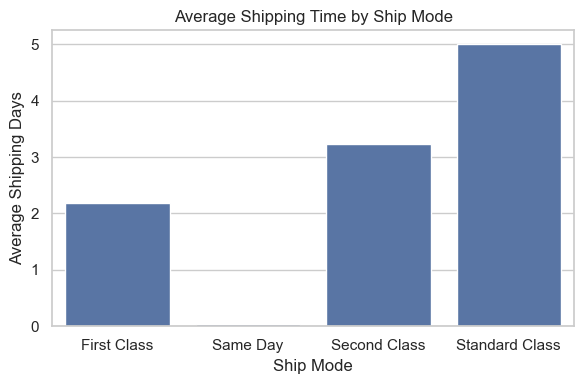

In [44]:
# Step 43: bar chart - avg shipping days by ShipMode
plt.figure(figsize=(6, 4))
sns.barplot(data=shipmode_summary, x="ShipMode", y="AvgShippingDays")

plt.title("Average Shipping Time by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Average Shipping Days")
plt.tight_layout()
plt.show()

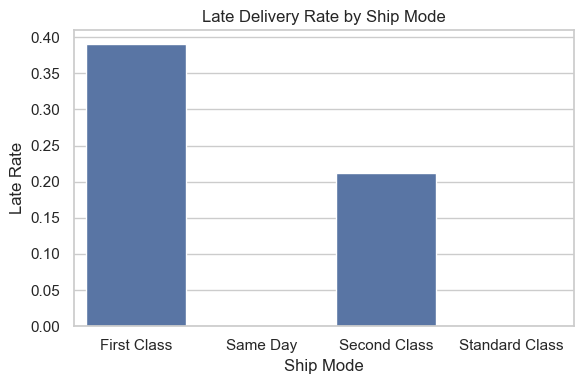

In [45]:
# Step 44: bar chart - late delivery rate by ShipMode
plt.figure(figsize=(6, 4))
sns.barplot(data=shipmode_summary, x="ShipMode", y="LateRate")

plt.title("Late Delivery Rate by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Late Rate")
plt.tight_layout()
plt.show()